# ANLY-590 Assignment 2

## 1. Feedforward: Building a ReLU neural network

### -- Draw a network with: 2 inputs,  1 hidden layers with 3 hidden units, and a 1-class output (for binary classiﬁcation) .

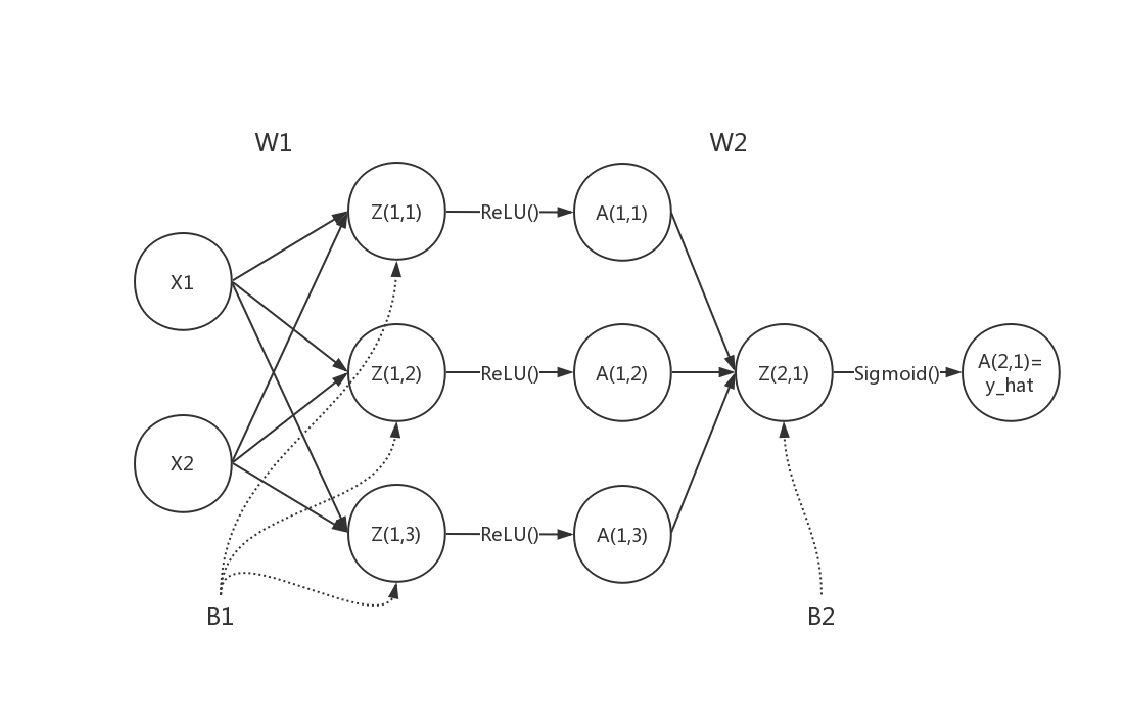

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
nn = mpimg.imread('nn.jpg')
plt.rcParams['figure.figsize'] = (20, 20)
plt.axis('off')
plt.imshow(nn)

###  -- Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

\begin{equation}
Z_{1}^{1}=X_{1} W_{11}^{1}+X_{2} W_{21}^{1}+B_{1}^{1}
\end{equation}

\begin{equation}
Z_{2}^{1}=X_{1} W_{12}^{1}+X_{2} W_{22}^{1}+B_{2}^{1}
\end{equation}

\begin{equation}
Z_{3}^{1}=X_{1} W_{13}^{1}+X_{2} W_{23}^{1}+B_{3}^{1}
\end{equation}

\begin{equation}
A_{1}^{1}=\operatorname{ReLU}\left(Z_{1}^{1}\right)
\end{equation}

\begin{equation}
A_{2}^{1}=\operatorname{ReLU} \left(Z_{2}^{1}\right)
\end{equation}

\begin{equation}
A_{3}^{1}=\operatorname{ReLU}\left(Z_{3}^{1}\right)
\end{equation}

\begin{equation}
Z_{1}^{2}=A_{1}^{1} W_{11}^{2}+A_{2}^{1} W_{21}^{2}+A_{3}^{1} W_{31}^{2}+B_{1}^{2}
\end{equation}

\begin{equation}
A_{1}^{2}=\text { Sigmoid }\left(Z_{1}^{2}\right)
\end{equation}

\begin{equation}
\hat{y}=A_{1}^{2}
\end{equation}

### -- Write out the forward-pass function in python, call it ff nn ReLu(...)

In [2]:
import numpy as np

    
def ReLU(X):
    return np.maximum(X,0)

def Sigmoid(X):
    s = 1 / (1 + np.exp(-X))
    return s

    
def ff__nn__ReLu(X, W1, B1, W2, B2):
    input_layer1 = X
    # activated_layer1 = ReLU(input_layer1)
    # print(activated_layer1)
    input_layer2 = np.dot(input_layer1, W1) + np.array(B1).T # attention to the dimension of B1
    # print(input_layer2)
    activated_layer2 = ReLU(input_layer2)
    # print(activated_layer2)
    input_final = np.dot(activated_layer2, W2) + B2
    return Sigmoid(input_final)

# X = [[[1,-1], [-1,1]]] #(2,2)
# W1 = [[1,1,1], [-1,-1,-1]] #(2,3) product will be (2,3) as h1, h2, h3
# B1 = [1,-1,1] # (3,)
# W2 = [2,2,2]  # (3,) product will be(2,1)
# B2 = [1]      # (1,1)
# ### dimension detection ###
# # B1 = [1,-1,1]
# # np.shape(B1)

X = [[1,-1],[0,-1],[0,1]]
W1 = [[1,-1,0],[0,0,0.5]]
B1 = [[0],[0],[1]]
# B1 = np.array(B1).T
W2 = [[1],[0],[-1]]
B2 = [1]
print("the class probabilities associated with the forward pass of each sample are:\n", ff__nn__ReLu(X, W1, B1, W2, B2))

the class probabilities associated with the forward pass of each sample are:
 [[0.81757448]
 [0.62245933]
 [0.37754067]]


## 2. Gradient Descent

### -- What are the partial derivatives of f with respect to x and to y?

\begin{equation}
f(x, y)=\left(1-x^{3}\right)+100\left(y^{2}-x\right)^{2}
\end{equation}

\begin{equation}
\frac{\partial f(x, y)}{\partial x}=-3 x^{2}+200 x-200 y^{2}
\end{equation}

\begin{equation}
\frac{\partial f(x, y)}{\partial y}=400 y^{3}-400 x y
\end{equation}

### -- Create a visualization of the contours of this function.

surface plot is below:


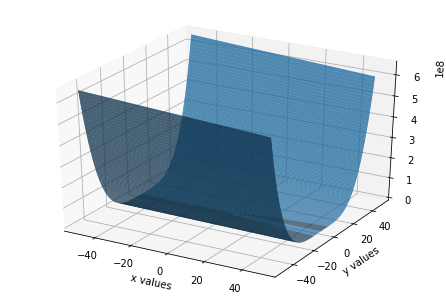

contour plot is below:


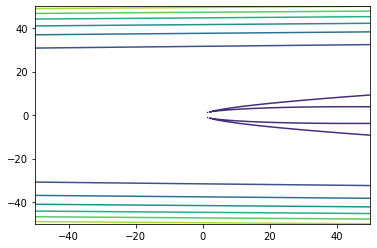

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def f_x_y(x, y):
    ans = (1 - x * x * x) + 100 * (y * y - x) * (y * y - x)
    return ans

x = np.linspace(-50,50,300)
y = np.linspace(-50,50,300)
X, Y = np.meshgrid(x, y)
Z = f_x_y(X, Y)
# print(X, Y)
# cs = plt.contour(X, Y, Z)
print("surface plot is below:")
fig = plt.figure(facecolor='w')
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z,rstride=1,cstride=1)
plt.xlabel("x values")
plt.ylabel("y values")
# ax.view_init(elev=10, azim=0)
plt.show()
print("contour plot is below:")
Xx, Yy = np.meshgrid(x,y)
plt.contour(Xx, Yy, f_x_y(Xx,Yy))
plt.show()

### -- Write a Gradient Descent algorithm for ﬁnding the minimum of the function. Visualize your results with a few diﬀerent learning rates.

When learning rate is 0.000055:



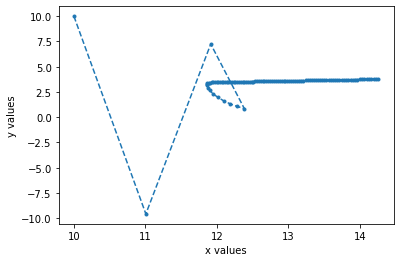

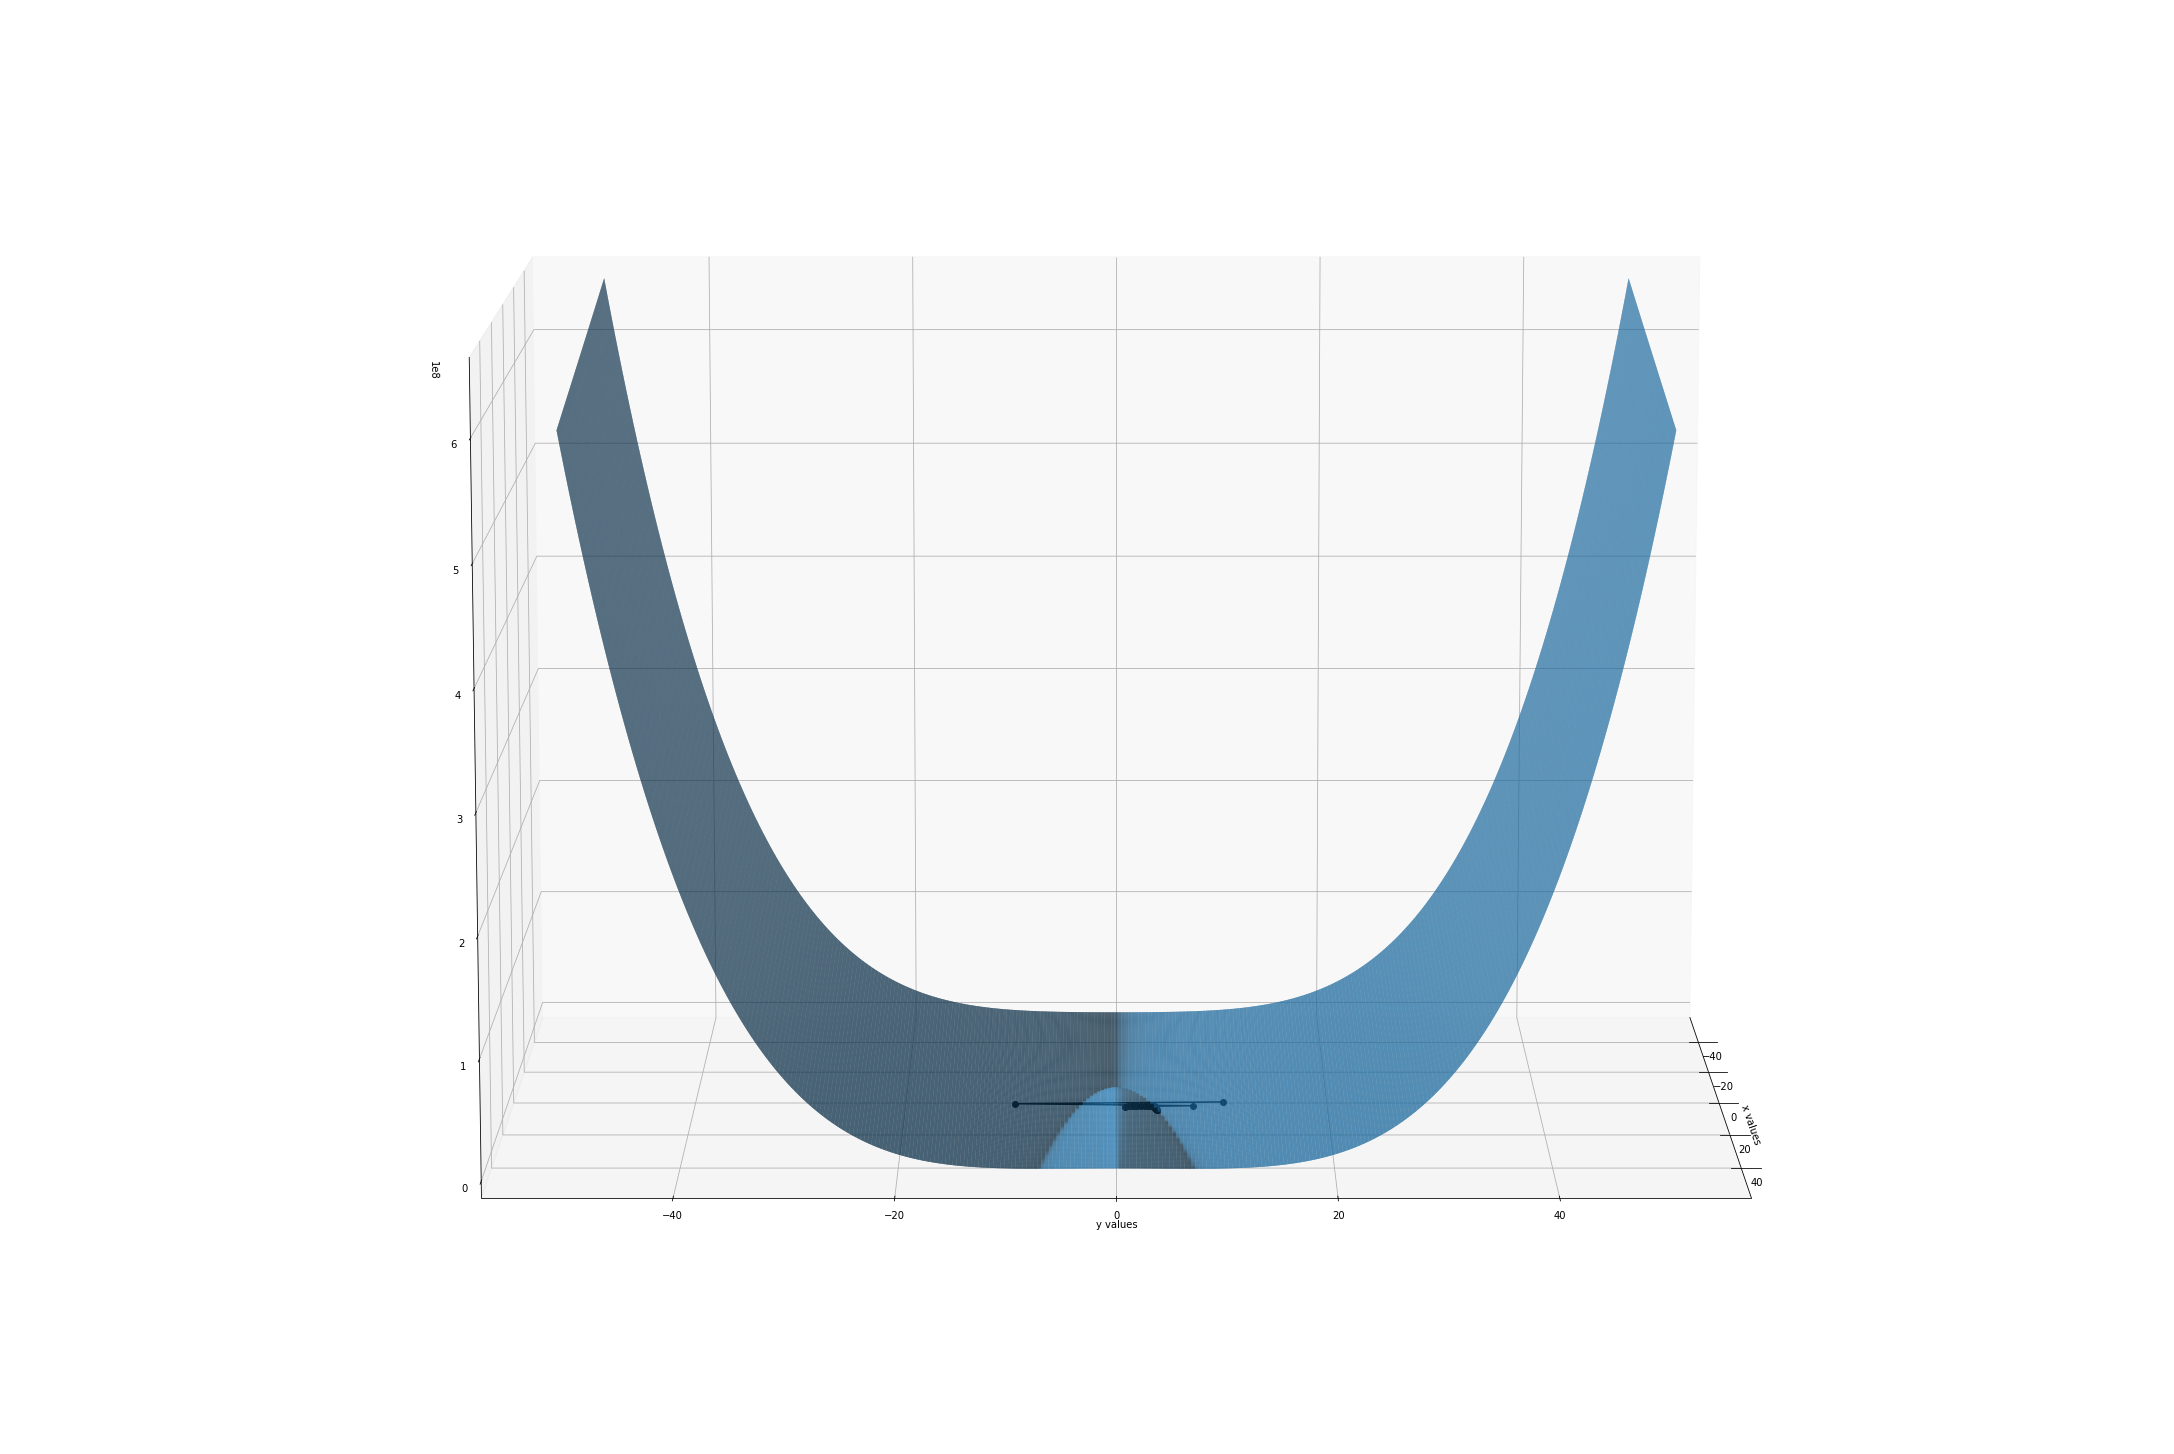

When learning rate is 0.00005:



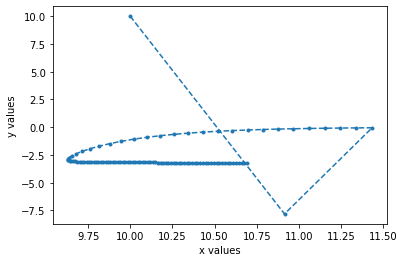

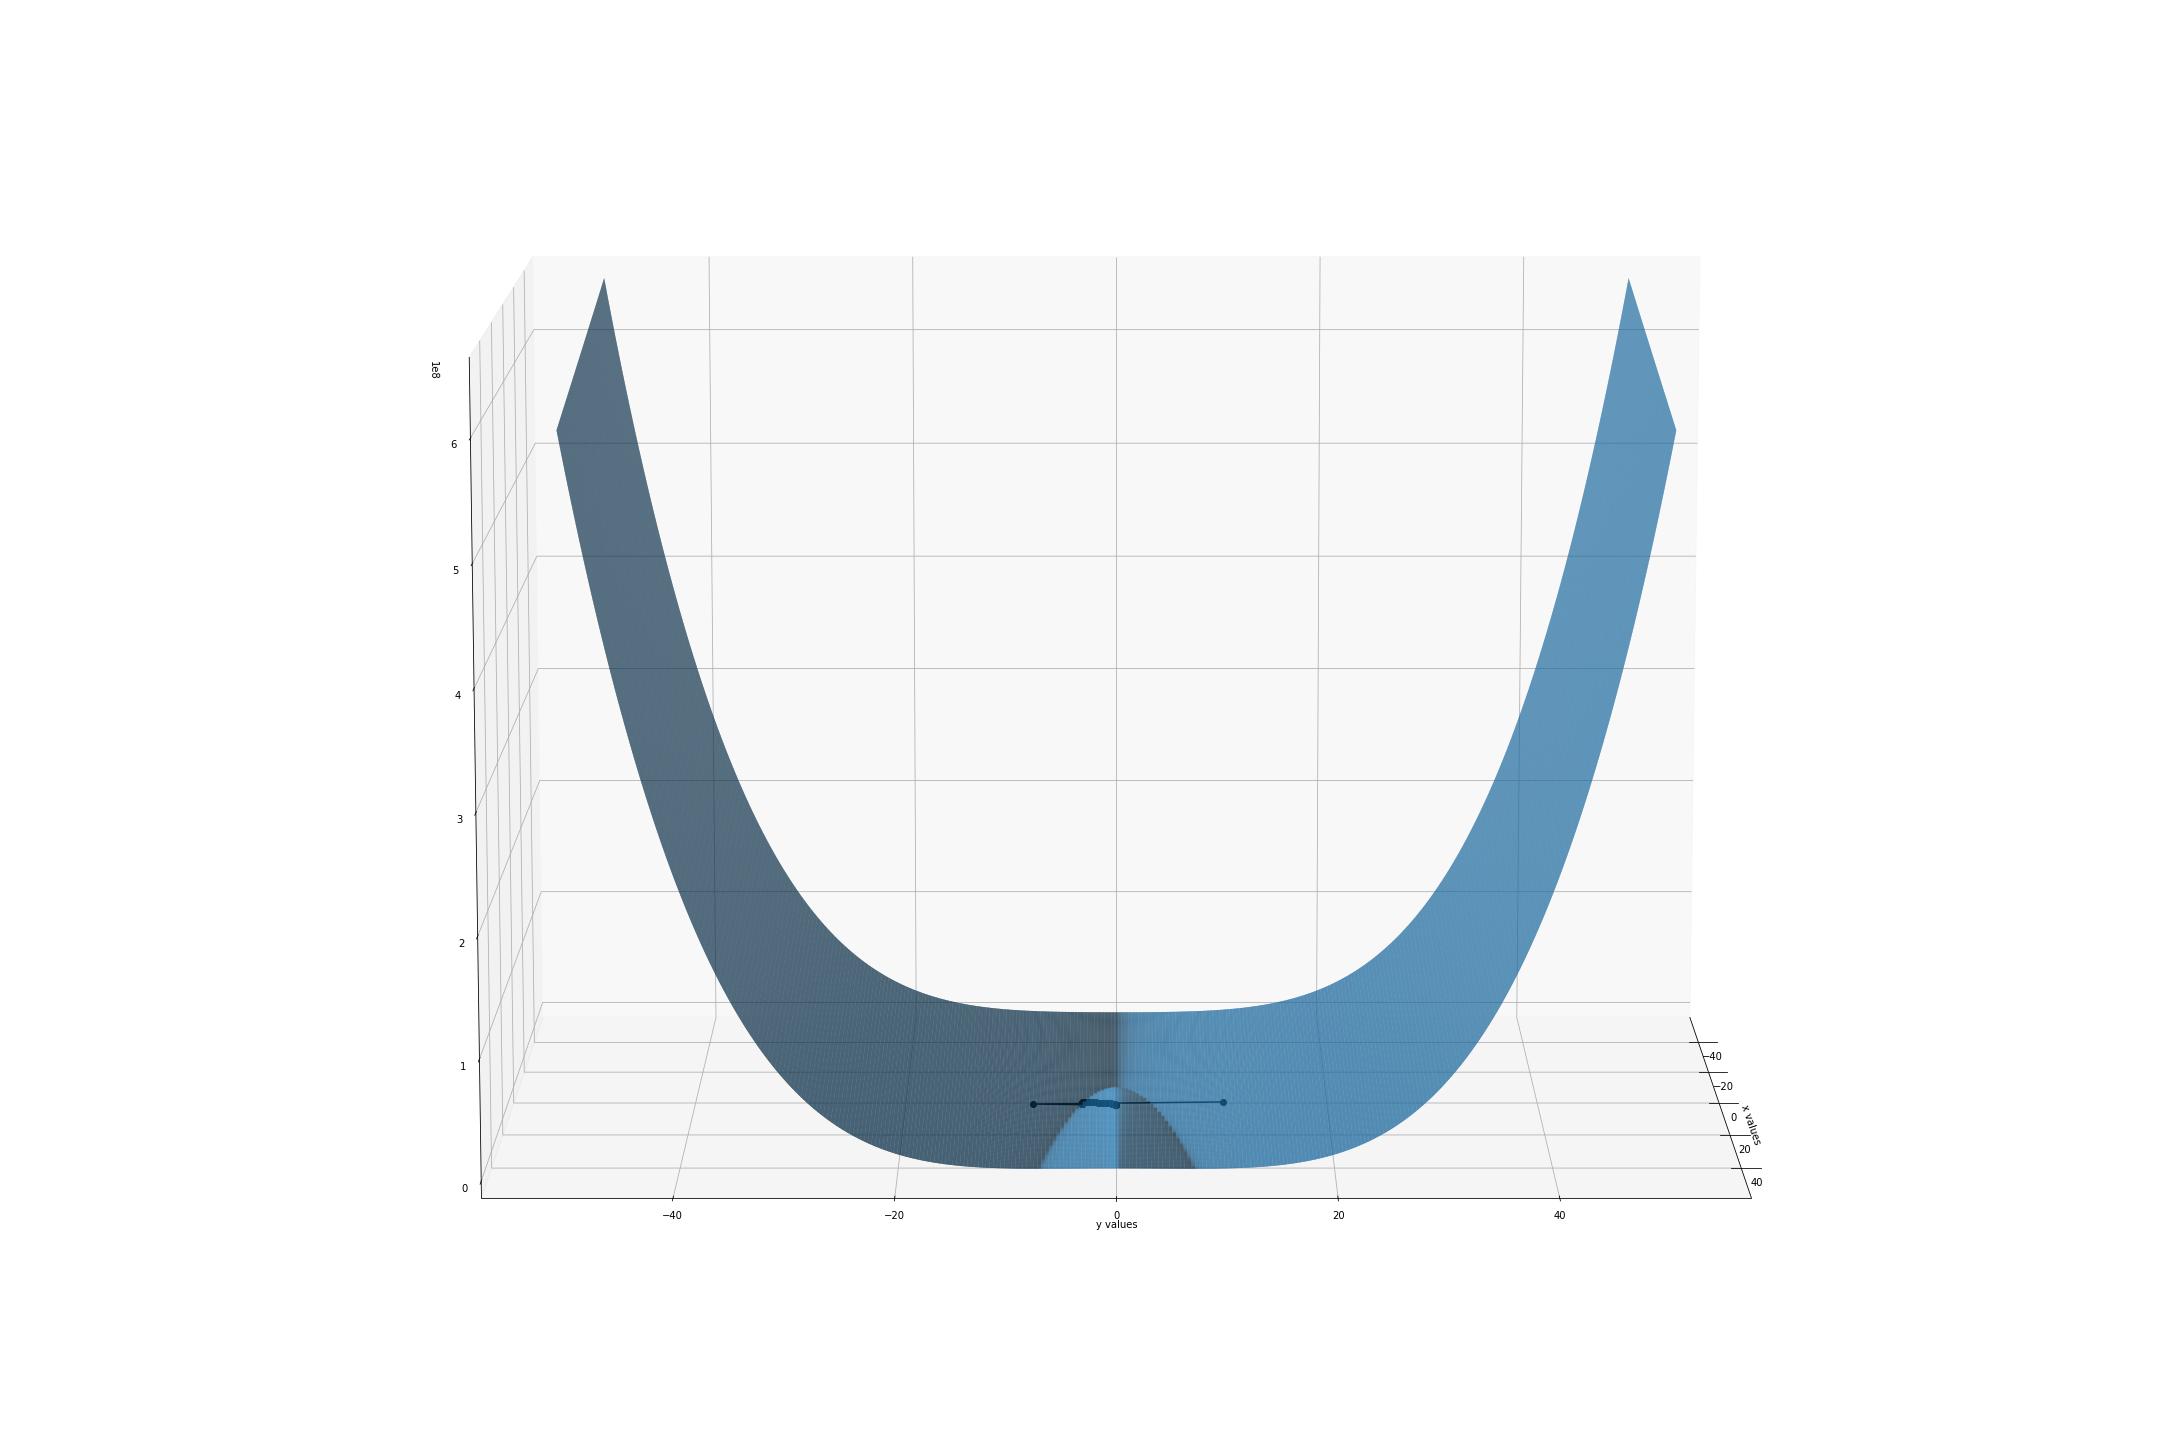

When learning rate is 0.00003:



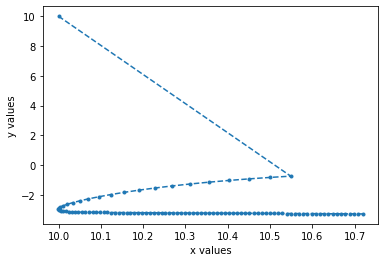

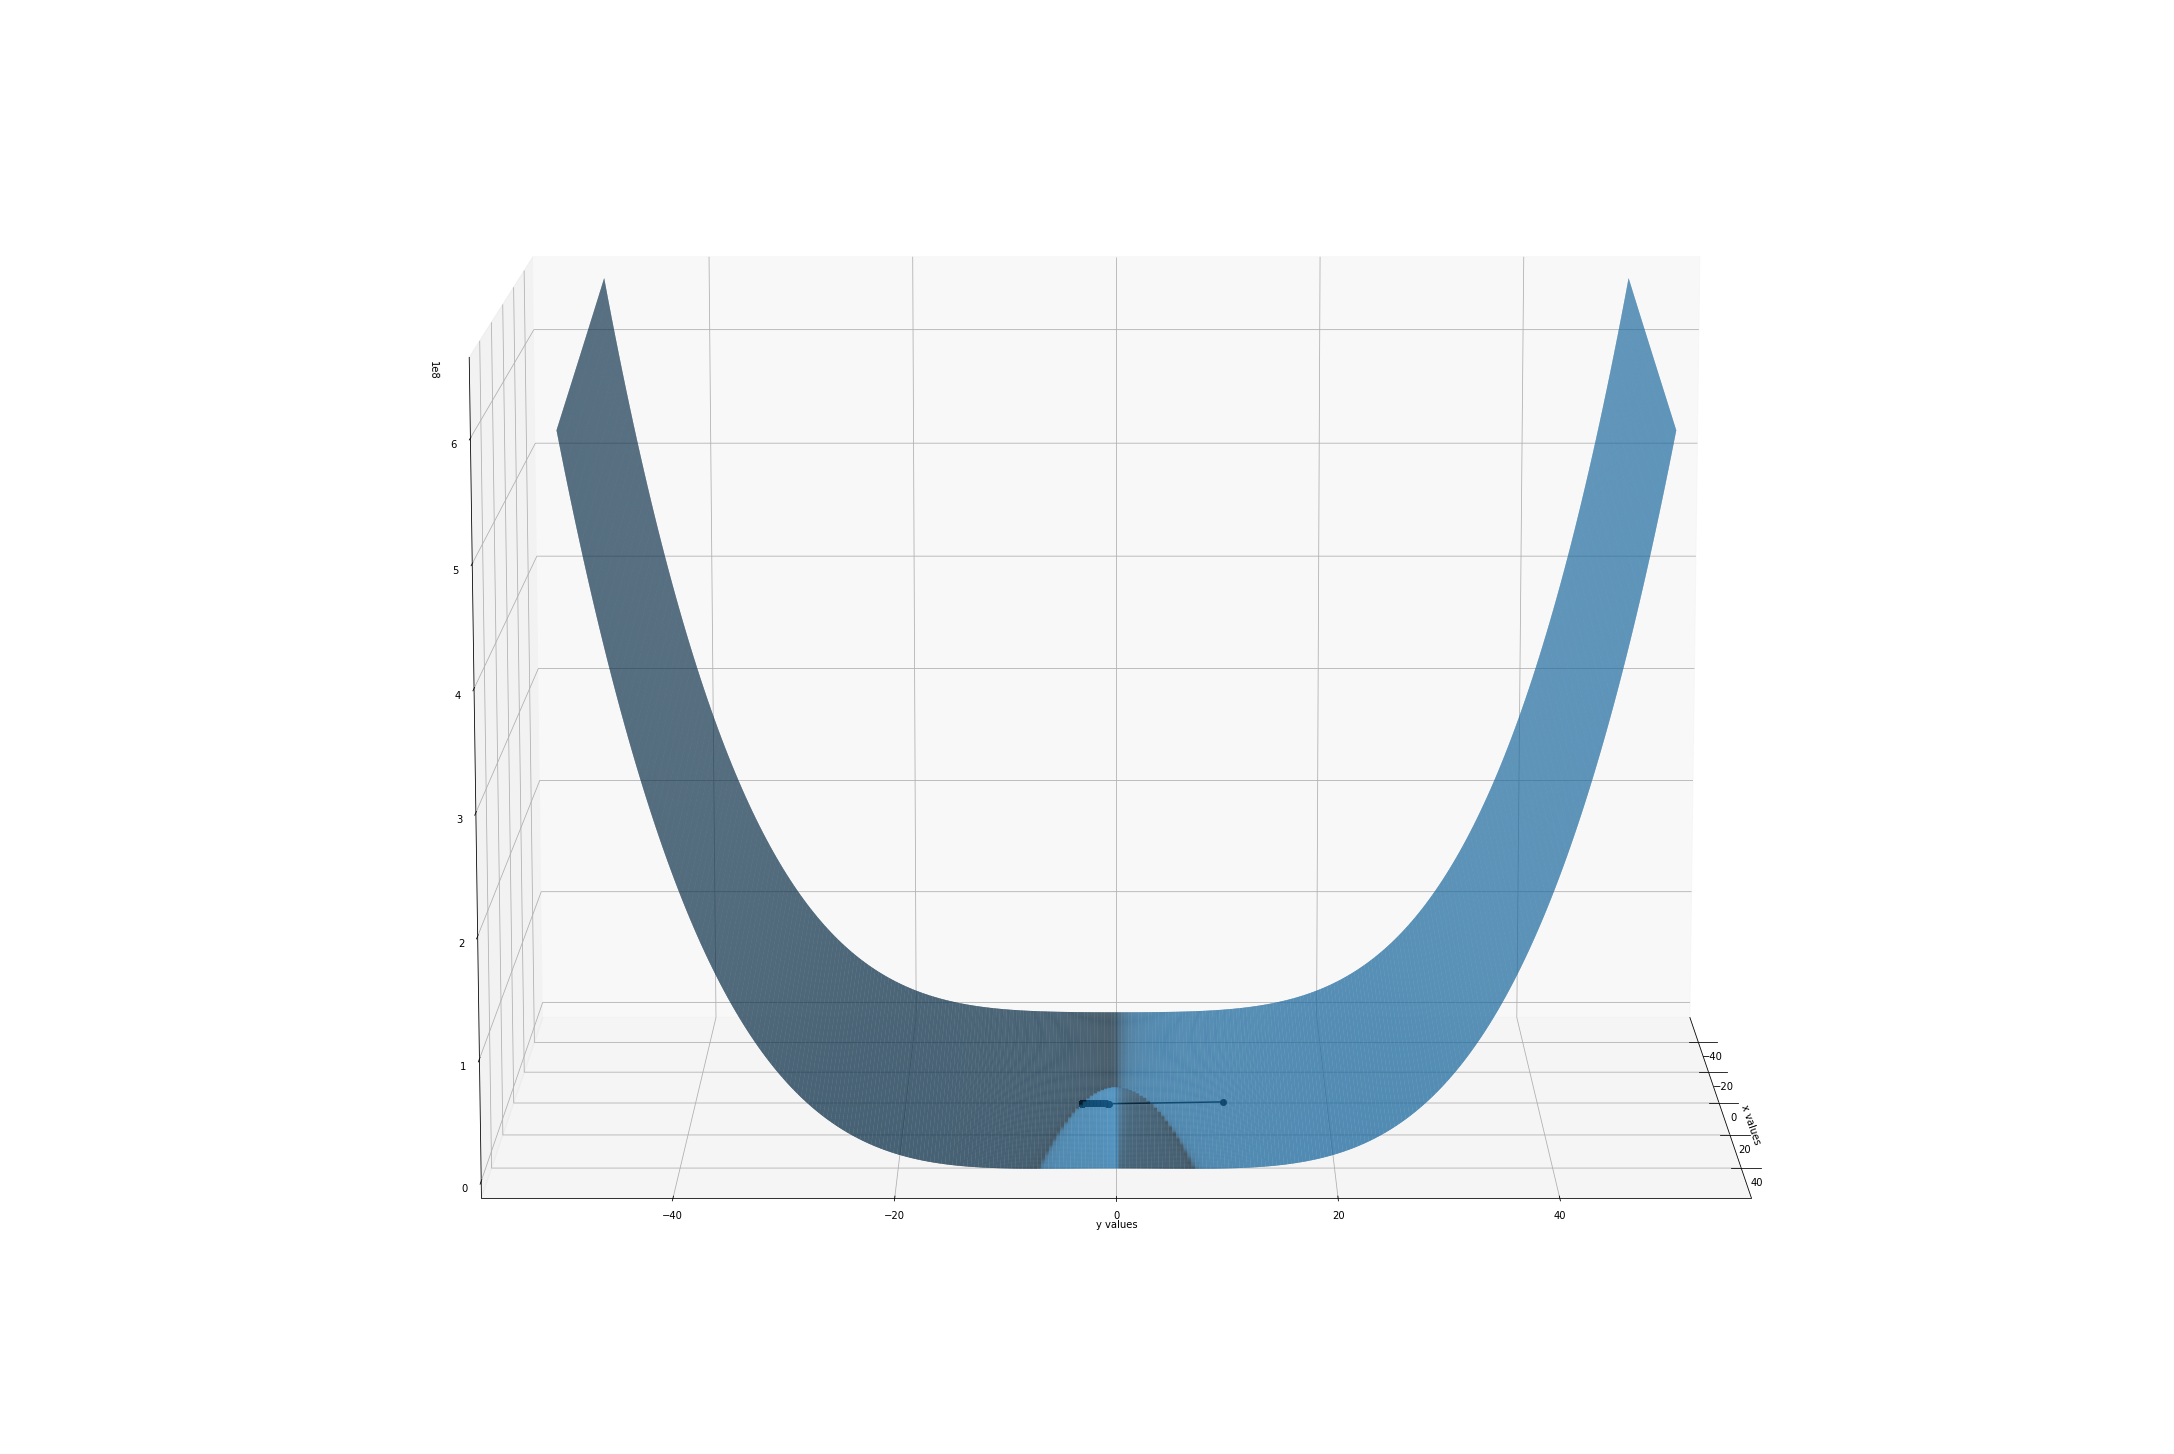

In [4]:
def grad_fx(x, y):
    ans_x = -3*x*x + 200*x - 200*y*y
    # print(ans_x)
    return ans_x

def grad_fy(x, y):
    ans_y = 400*y*y*y - 400*x*y
    return ans_y

def grad_des_pics(starting_x, starting_y, iters, learning_rate):
    inputs_set = [(starting_x,starting_y)]
    for i in range(iters):
        starting_x = starting_x - learning_rate*grad_fx(starting_x, starting_y)
        starting_y = starting_y - learning_rate*grad_fy(starting_x, starting_y)
        # print(starting_x, starting_y)
        inputs_set.append((starting_x, starting_y))
    xi = []
    yi = []
    zi = []
    for unit in inputs_set:
        xi.append(unit[0])
        yi.append(unit[1])
        zi.append(f_x_y(unit[0], unit[1]))
        
    plt.plot(xi, yi, '.--')
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.show()

    fig1 = plt.figure(figsize=(30,20))
    ax = Axes3D(fig1)
    ax.plot_surface(X, Y, Z,rstride=1,cstride=1)
    ax.plot(xi, yi, zi,'ko-')
    ax.view_init(elev=10, azim=0)
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.show()
    
                          
#     return inputs_set
print("When learning rate is 0.000055:\n")
grad_des_pics(10, 10, 100, 0.000055)
print("When learning rate is 0.00005:\n")
grad_des_pics(10, 10, 100, 0.00005)
print("When learning rate is 0.00003:\n")
grad_des_pics(10, 10, 100, 0.00003)

# xi = []
# yi = []
# zi = []
# for unit in res:
#     xi.append(unit[0])
#     yi.append(unit[1])
#     zi.append(f_x_y(unit[0], unit[1]))
    
# # print(xi, yi)
# # Xi, Yi = np.meshgrid(xi, yi)
# # Zi = f_x_y(Xi, Yi)
# # print(Zi)
# plt.plot(xi, yi, '.--')
# plt.xlabel("x values")
# plt.ylabel("y values")
# plt.show()

# fig1 = plt.figure(facecolor='w')
# ax = Axes3D(fig1)
# ax.plot_surface(X, Y, Z,rstride=1,cstride=1)
# ax.plot(xi, yi, zi,'ko-')
# ax.view_init(elev=10, azim=0)
# plt.xlabel("x values")
# plt.ylabel("y values")
# plt.show()

### -- Write a Gradient Descent With Momentum algorithm for ﬁnding the minimum. Visualize your results with a few diﬀerent settings of the algorithm’s hyperparameters.

When learning rate is 0.000055 and momentum is 0.3:



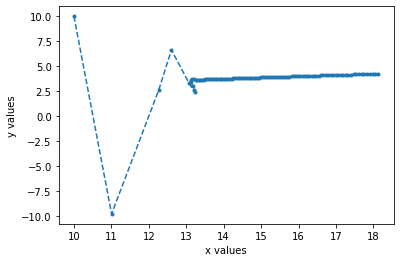

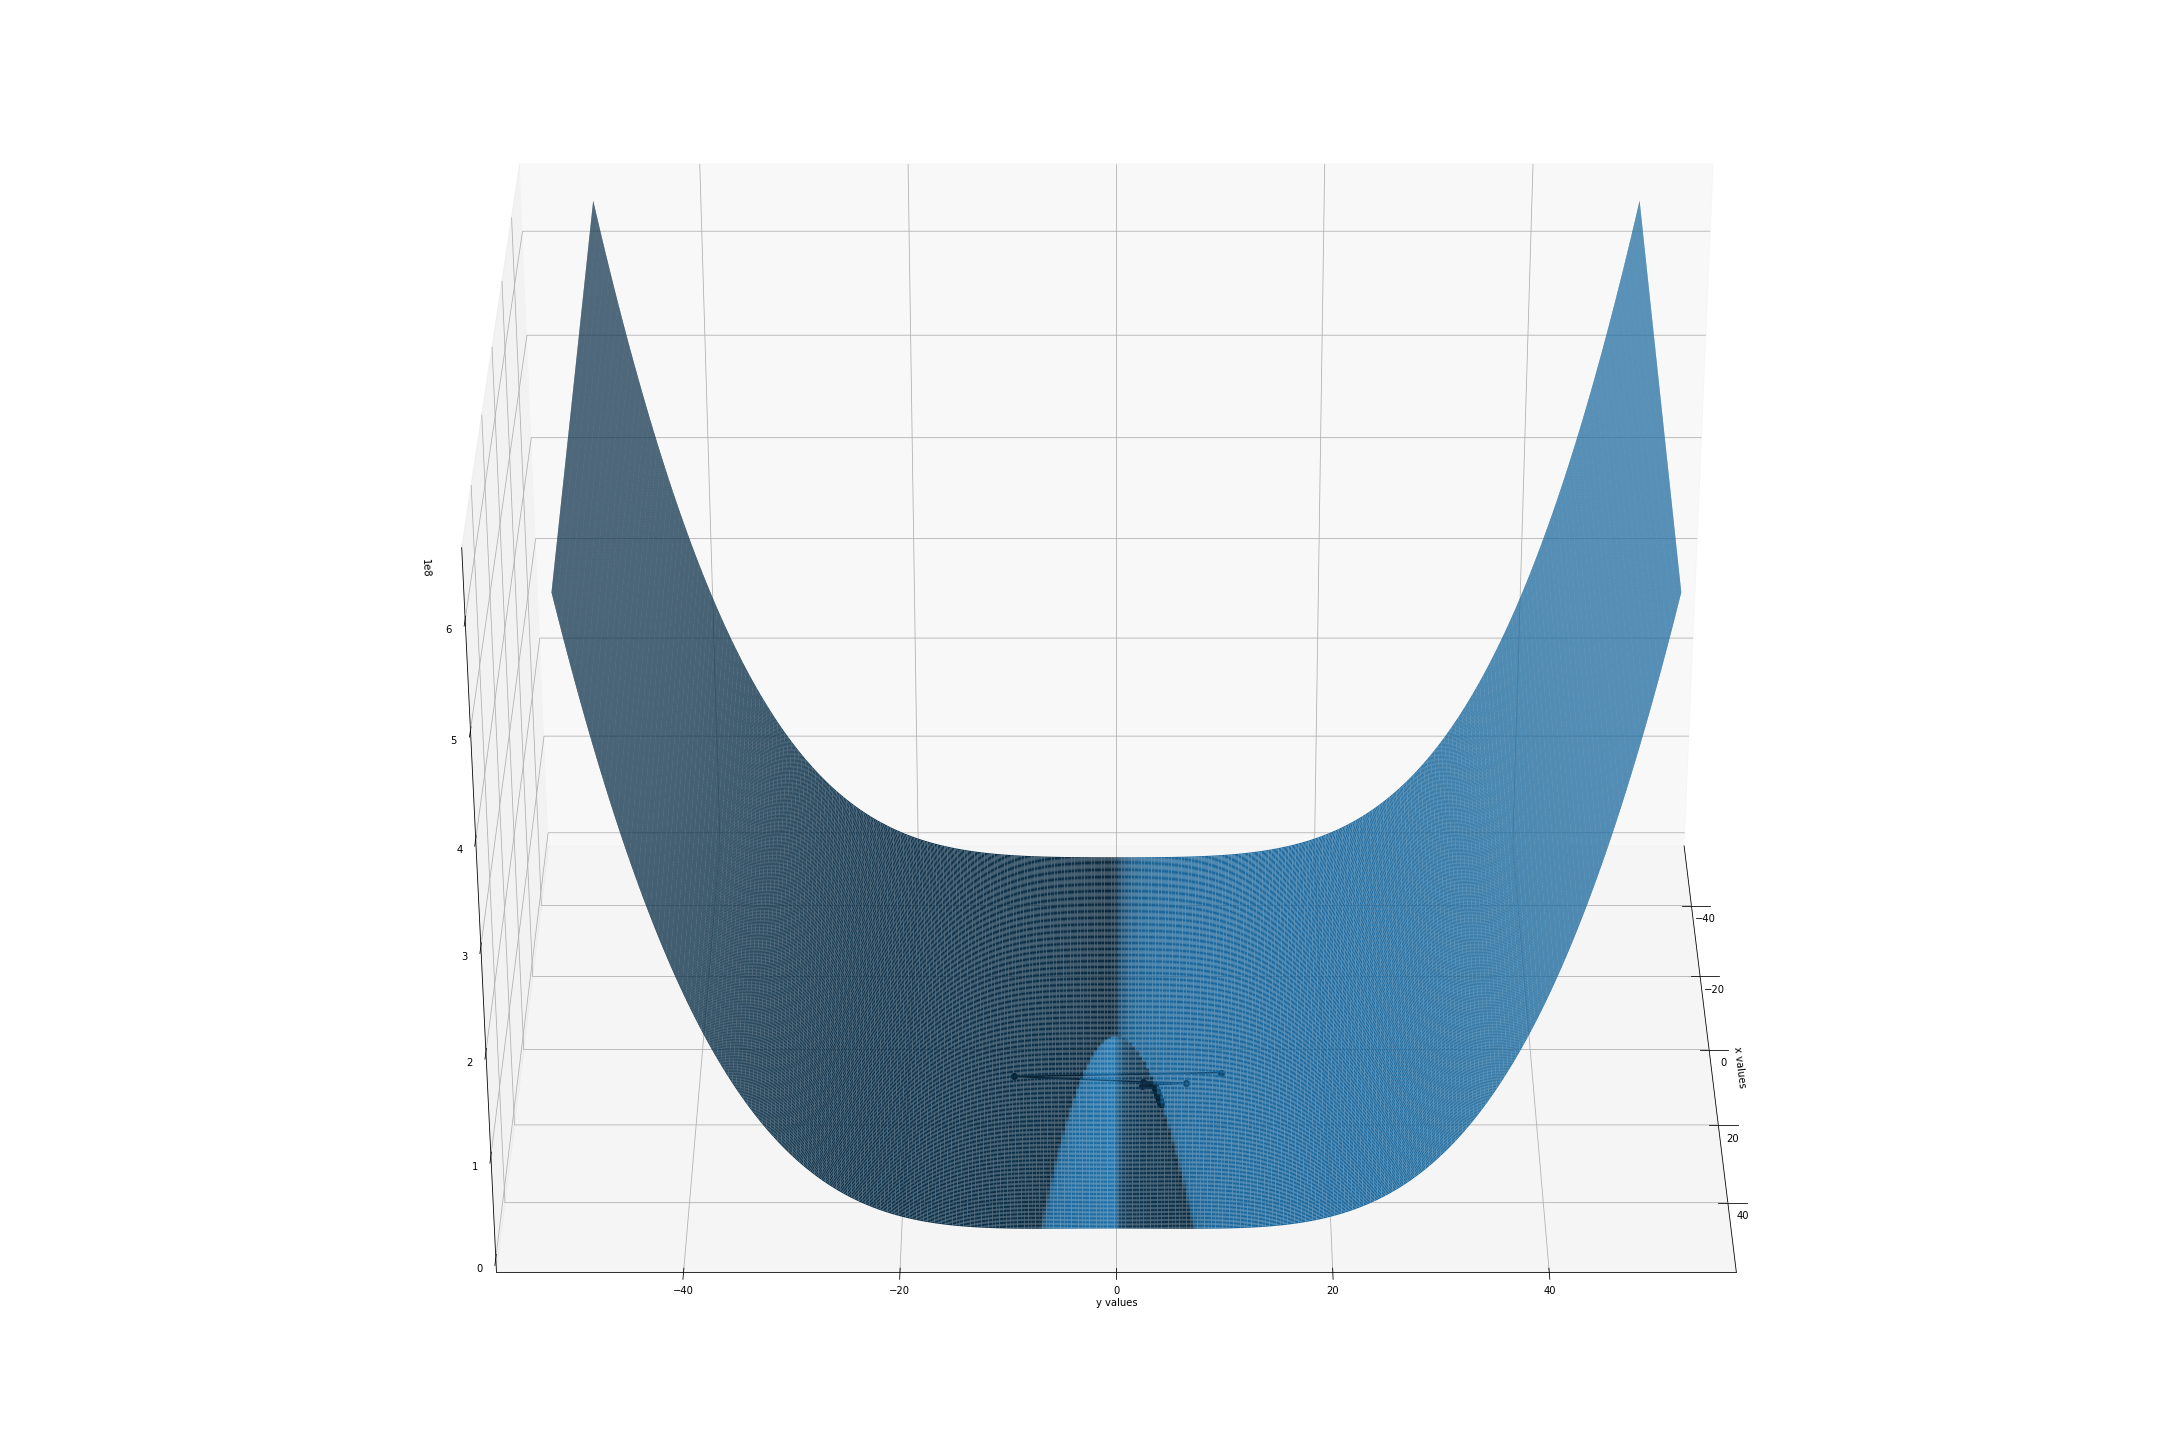

When learning rate is 0.00005 and momentum is 0.3:



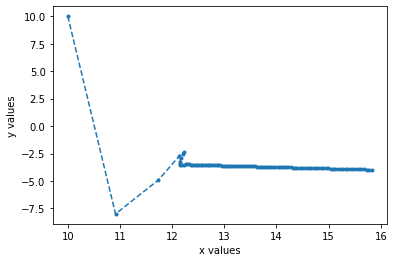

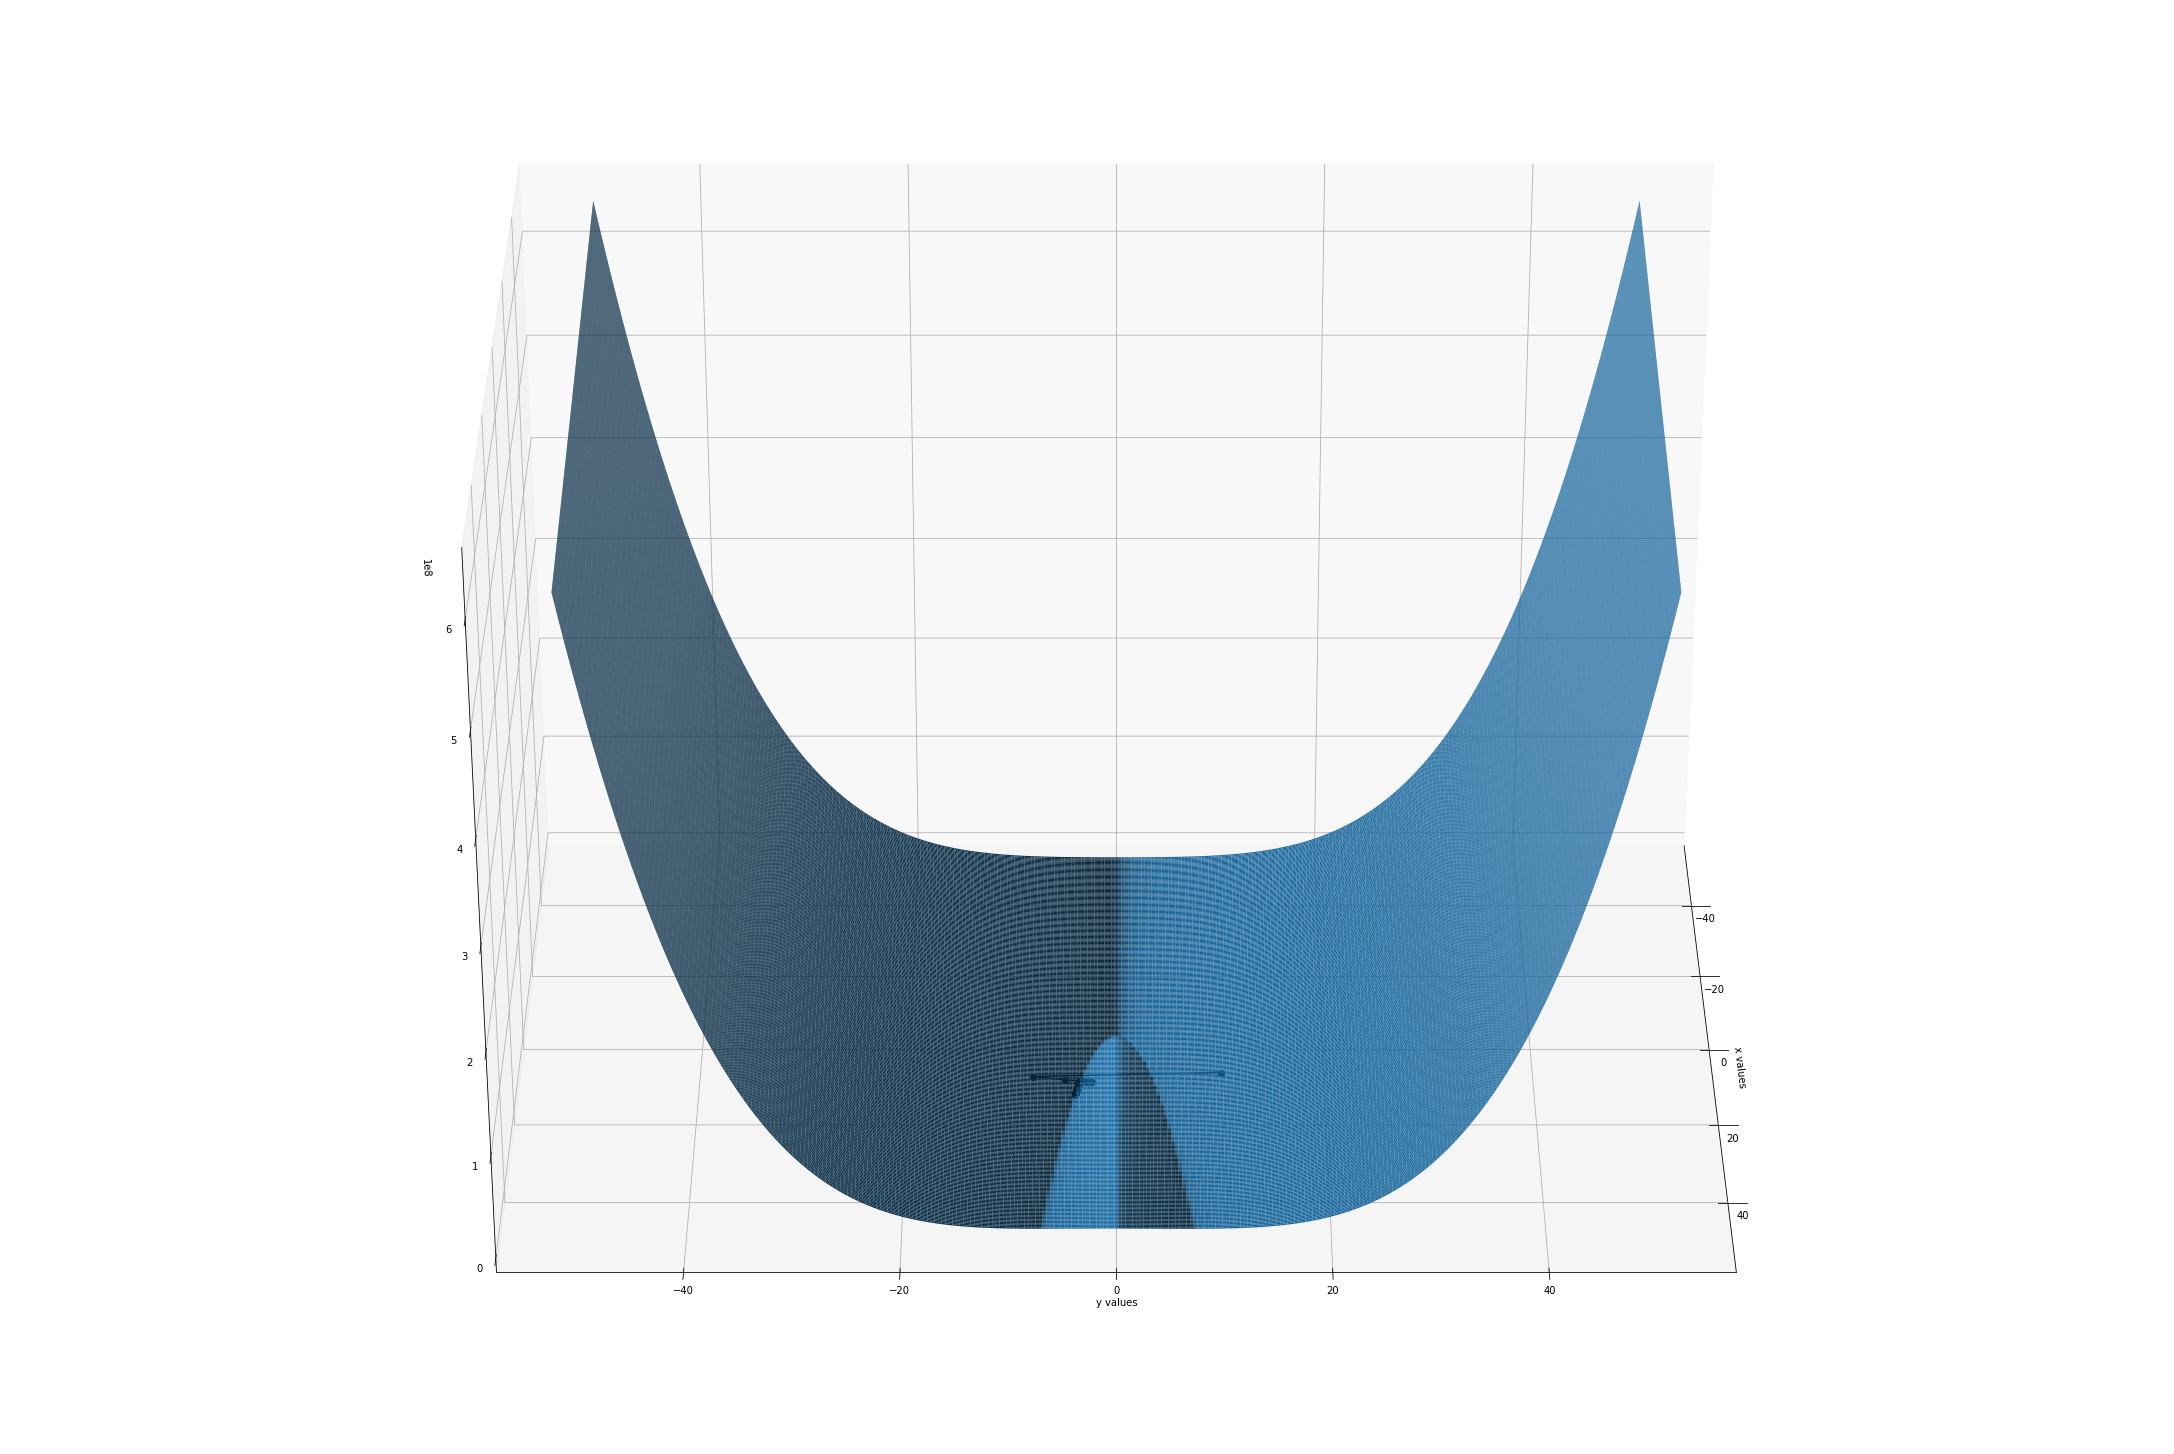

When learning rate is 0.00003 and momentum is 0.3:



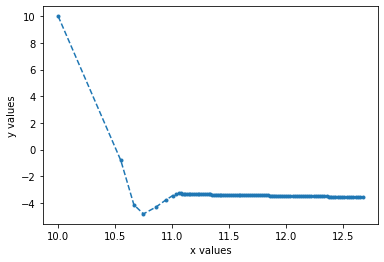

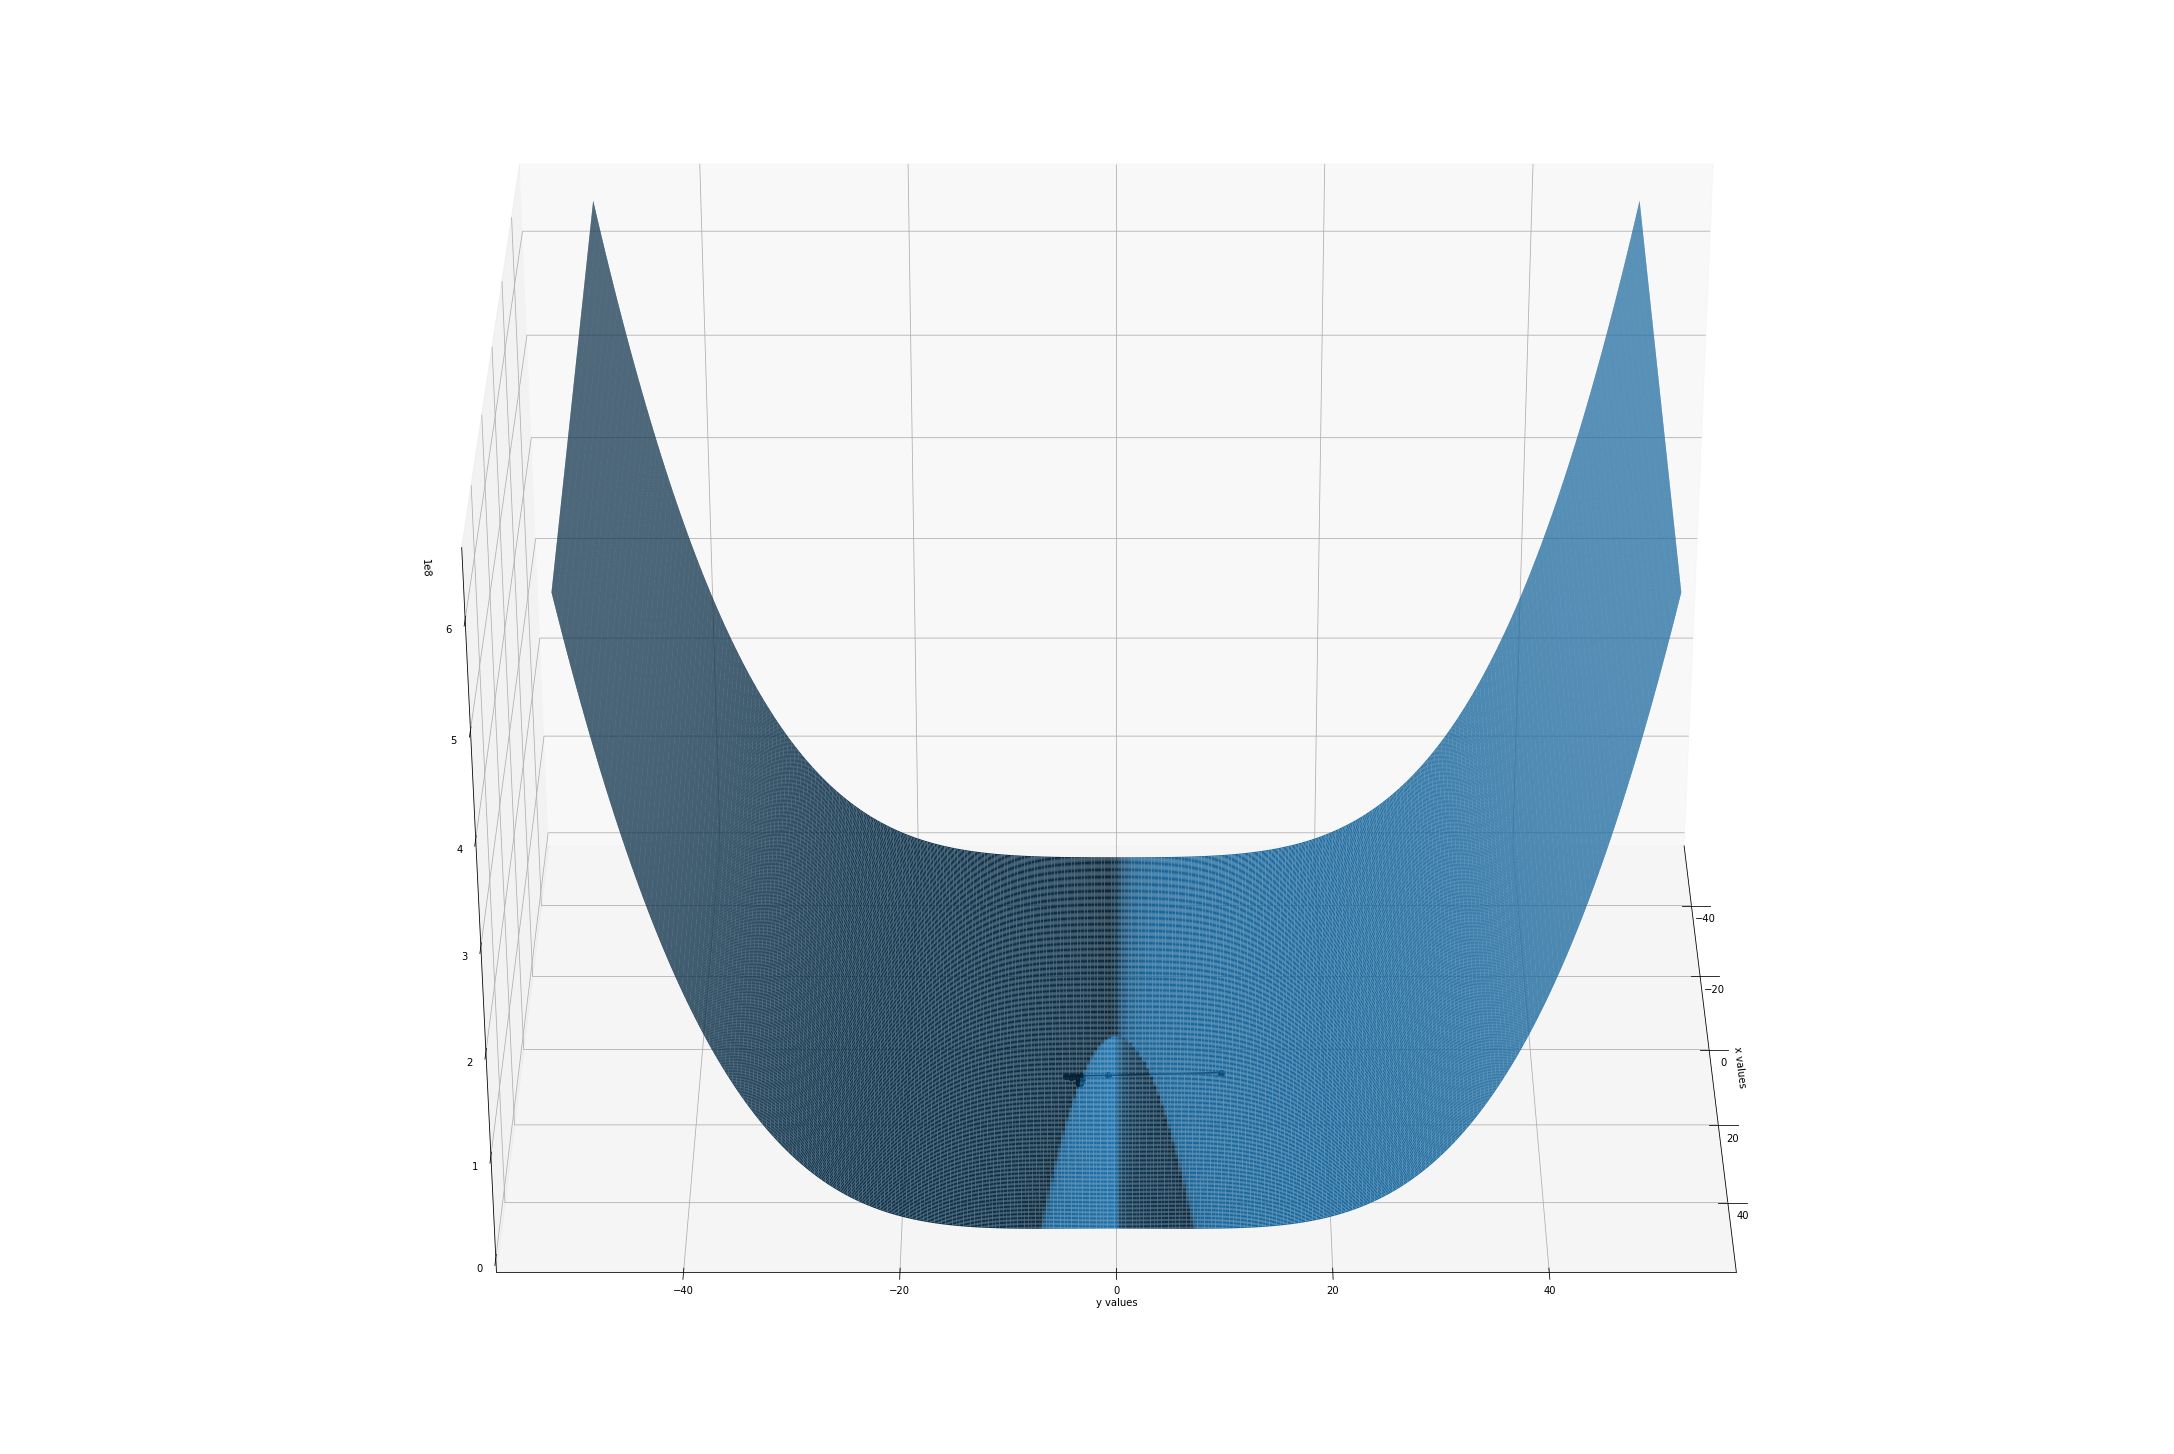

In [5]:
def grad_fx(x, y):
    ans_x = -3*x*x + 200*x - 200*y*y
    # print(ans_x)
    return ans_x

def grad_fy(x, y):
    ans_y = 400*y*y*y - 400*x*y
    return ans_y

def grad_des_momentum_pics(starting_x, starting_y, iters, learning_rate, momentum):
    inputs_set = [(starting_x,starting_y)]
    vx = 0
    vy = 0
    for i in range(iters):
        dx = grad_fx(starting_x, starting_y)
        dy = grad_fy(starting_x, starting_y)
        vx = -dx * learning_rate + momentum * vx
        vy = -dy * learning_rate + momentum * vy
        starting_x += vx
        starting_y += vy
#         starting_x = starting_x - learning_rate*grad_fx(starting_x, starting_y)
#         starting_y = starting_y - learning_rate*grad_fx(starting_x, starting_y)
        # print(starting_x, starting_y)
        inputs_set.append((starting_x, starting_y))
    xi = []
    yi = []
    zi = []
    for unit in inputs_set:
        xi.append(unit[0])
        yi.append(unit[1])
        zi.append(f_x_y(unit[0], unit[1]))
    
    plt.plot(xi, yi, '.--')
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.show()

    fig1 = plt.figure(figsize=(30,20))
    ax = Axes3D(fig1)
    ax.plot_surface(X, Y, Z,rstride=1,cstride=1)
    ax.plot(xi, yi, zi,'ko-')
    ax.view_init(elev=30, azim=0)
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.show()
    
                          
#     return inputs_set
print("When learning rate is 0.000055 and momentum is 0.3:\n")
grad_des_momentum_pics(10, 10, 100, 0.000055,0.3)
print("When learning rate is 0.00005 and momentum is 0.3:\n")
grad_des_momentum_pics(10, 10, 100, 0.00005,0.3)
print("When learning rate is 0.00003 and momentum is 0.3:\n")
grad_des_momentum_pics(10, 10, 100, 0.00003,0.3)

### --For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

\begin{equation}
\frac{\partial L}{\partial W_{2}}=-\left(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}}\right) \circ \sigma\left(Z_{2}\right) \otimes A_{1}
\end{equation}

\begin{equation}
\frac{\partial L}{\partial B_{2}}=-\left(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}}\right) \circ \sigma^{\prime}\left(Z_{2}\right)
\end{equation}

\begin{equation}
\frac{\partial L}{\partial W_{1}}=\left(W^{2}\right)^{T}\left[-\left(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}}\right)\right] \circ \sigma^{\prime}\left(Z_{1}\right) \otimes X
\end{equation}

\begin{equation}
\frac{\partial L}{\partial B_{1}}=\left(W^{2}\right)^{T}\left[-\left(\frac{y}{\hat{y}}-\frac{1-y}{1-\hat{y}}\right)\right] \circ \sigma^{\prime}\left(Z_{1}\right)
\end{equation}

### -- Generate a synthetic dataset like the XOR pattern 

(400, 2)
(400, 1)


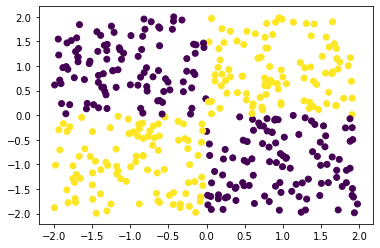

In [6]:
N = 400
np.random.seed(3)
x = np.random.uniform(-2,2,N*2).reshape(N,2)
y_ = [1]*N
for i in range(N):
    if x[i][0] * x[i][1] < 0:
        y_[i] = 0
plt.scatter(x[:,0],x[:,1], c=y_)

y = np.array(y_)
y = np.expand_dims(y, axis=1)
print(x.shape)
print(y.shape)

### -- Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

### -- Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

### -- Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more eﬃciently.

Regular Gradient Descent:



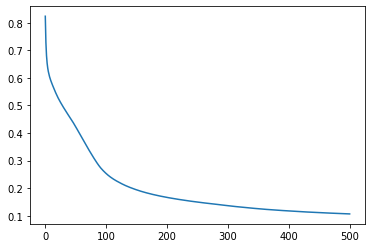

Gradient Descent with Momentum:



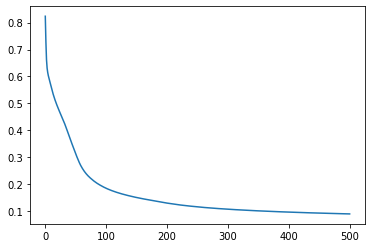

In [7]:
def loss_f(y, y_hat):
    from sklearn.metrics import f1_score
    # print(f1_score(y, np.where(y_hat > 0.5, 1, 0)))
    res = np.mean(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat), axis=0)[0]
    return res

def ReLU_derivative(X):
    return np.where(X>0, 1, 0)

def Sigmoid_derivate(X):
    res = Sigmoid(X)*(1-Sigmoid(X))
    return res

# W1 = [[1,-1,0],[0,0,0.5]]
# B1 = [[0],[0],[1]]
# B1 = np.array(B1).T
# W2 = [[1],[0],[-1]]
# B2 = [1]

def forward_storage(X, params):
    W1, W2, B1, B2 = params
    Z1 = np.dot((X), W1) + B1.T
#     print(np.dot(np.array(X), np.array(W1)).shape)
#     print((np.array(B1).T).shape)
    A1 = ReLU(Z1)
    # print(A1)
    Z2 = np.dot(A1, W2) + B2.T
    # print(Z2)
    y_hat = Sigmoid(Z2)
    return y_hat, Z1, A1, Z2


# I used np.einsum() to simplfy the multiplications of matirxes
def grad_f(X, y, params):
    # W1 2,3
    # W2 3,1
    # B1 1,3
    # B2 1,1
    # delta2 = dB2 N,1
    # dW2 = delta2 outer A1 N,3
    # dB1 = delta1 N,3
    # dW1 = delta1 outer X N,2,3
    W1, W2, B1, B2 = params
    y_hat, Z1, A1, Z2 = forward_storage(X, params)
    dL_y_hat = -((y/y_hat) - (1-y)/(1-y_hat)) 
    delta2 = dL_y_hat * Sigmoid_derivate(Z2) 
    # N,1
    dB2 = delta2                                                     # N,1
    dB2_avg = np.mean(dB2, axis=0,keepdims=True)                     # 1,1
    # print(dB2_avg.shape)
    dW2 = np.einsum('ij,ik->ijk',delta2,A1)    
# N,1,3
    dW2 = np.squeeze(dW2)                                            # N,3
    dW2_avg = np.mean(dW2, axis=0,keepdims=True).T                     # 1,3
    # print(dW2_avg.shape)
#     print(ReLU_derivative(Z1).shape)
#     print(delta2.shape)
#     print((np.dot(delta2,np.array(W2).T)).shape)
    delta1 = np.dot(delta2,np.array(W2).T) * ReLU_derivative(Z1)     # N,3
    dB1 = delta1                                                     # N,3
    dB1_avg = np.mean(dB1, axis=0,keepdims=True)                     # 1,3
    # print(dB1_avg.shape)
    dW1 = np.einsum('ij,ik->ikj',delta1,X)                           # N,2,3
    dW1_avg = np.mean(dW1, axis=0)                                   # 1,2,3
    # print(dW1_avg.shape)
    
    
#     for i in range(X.shape[0]):
#         dL_y_hat = (y[i]/y_hat[i])-((1-y[i])/(1-y_hat[i]))
#         error_2 = dL_y_hat * Sigmoid_derivate(Z2[i])
#         dW2 = np.outer(error_2,A1[i])
#         dB2 = error_2
#         error_1 = np.dot(np.array(W2).T, error_2,ReLU_derivative(Z1[i])
#         dW1 = np.outer(error_1,X[i])
#         dB1 = error_1

    
    
    return (dW1_avg, dW2_avg, dB1_avg, dB2_avg)    


# print(x.shape)
# print(y.shape)
# x(800,2)
# y(800,1)
# def grad_descent(x, y, parameters, iterations, learning_rate):
#     point = parameters
#     trajectory = [point]
#     losses = [loss_f(y, forward_storage(x,point)[0])]
    
#     for i in range(iterations):
#         y_hat = forward_storage(x, point)[0]
#         grad = grad_f(x, y,point)
#         for unit in grad:
#             # print(unit*learning_rate)
#             point= np.subtract(point,[j*learning_rate for j in grad])   
#         trajectory.append(point)
#         # losses.append(loss_f(y, forward_storage(x, point)[0]))
#     return (np.array(trajectory), losses)


def grad_des(x, y, params, iteras, lr):
    weights_bias = params
    W1 = np.array(params[0])
    W2 = np.array(params[1])
    B1 = np.array(params[2])
    B2 = np.array(params[3])
    trajectory = [weights_bias]
    y_hats = forward_storage(x, weights_bias)[0]
    # print(y_hats)
    losses = [loss_f(y, y_hats)]
    # print(losses)
    for i in range(iteras):
        y_hat = forward_storage(x, weights_bias)[0]
        dW1_avg, dW2_avg, dB1_avg, dB2_avg = grad_f(x,y,weights_bias)
        W1 = W1 - lr * dW1_avg
        W2 = W2 - lr * dW2_avg
        B1 = B1 - lr * (dB1_avg).T
        B2 = B2 - lr * (dB2_avg).T
        
        weights_bias = W1, W2, B1, B2
        trajectory.append(weights_bias)
        losses.append(loss_f(y, forward_storage(x, weights_bias)[0]))
    return trajectory, losses
    
def grad_des_momentum(x, y, params, iteras, lr, momentum):
    weights_bias = params
    v_W1 = 0
    v_W2 = 0
    v_B1 = 0
    v_B2 = 0
    W1 = np.array(params[0])
    W2 = np.array(params[1])
    B1 = np.array(params[2])
    B2 = np.array(params[3])
    trajectory = [weights_bias]
    y_hats = forward_storage(x, weights_bias)[0]
    # print(y_hats)
    losses = [loss_f(y, y_hats)]
    # print(losses)
    for i in range(iteras):
        y_hat = forward_storage(x, weights_bias)[0]
        dW1_avg, dW2_avg, dB1_avg, dB2_avg = grad_f(x,y,weights_bias)
        v_W1 = -dW1_avg * lr + momentum * v_W1
        v_W2 = -dW2_avg * lr + momentum * v_W2
        v_B1 = -(dB1_avg).T * lr + momentum * v_B1
        v_B2 = -(dB2_avg).T * lr + momentum * v_B2
        W1 = W1 + v_W1
        W2 = W2 + v_W2
        B1 = B1 + v_B1
        B2 = B2 + v_B2
        
        weights_bias = W1, W2, B1, B2
        trajectory.append(weights_bias)
        losses.append(loss_f(y, forward_storage(x, weights_bias)[0]))
    return trajectory, losses




W1 = [[1,-1,0],[0,0,0.5]]
B1 = [[0],[0],[1]]
W2 = [[1],[0],[-1]]
B2 = [1]    
params = np.array(W1), np.array(W2), np.array(B1), np.array(B2)
# print(parameters)
traj, losses = grad_des(x, y, params, 500, 0.5)
traj_m, losses_m = grad_des_momentum(x, y, params, 500, 0.5, 0.4)
print("Regular Gradient Descent:\n")
plt.plot(losses)
plt.show()
print("Gradient Descent with Momentum:\n")
plt.plot(losses_m)
plt.show()

### -- Plot a visualization of the ﬁnal decision boundary that your model has learned. Overlay the datapoints in this plot.

x.shape: (400, 2)
[[1]]
(499, 499) (499, 499)
(249001, 1)


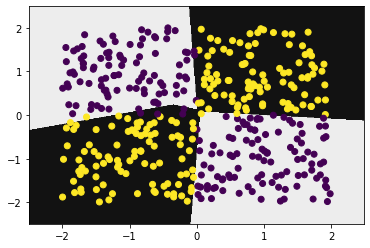

In [8]:
# plt.scatter(x_pos[:,0], x_pos[:,1],c="purple")
# plt.scatter(x_neg[:,0], x_neg[:,1],c="yellow")
# plt.show()

# print(traj,"\n",traj[-1])
print("x.shape:", x.shape)
# params_trained = traj[-1]
# print(params)
# W1_trained = params_trained[0]
# W2_trained = params_trained[1]
# B1_trained = params_trained[2]
# B2_trained = params_trained[3]
# # print(W1_trained,"\n\n",W2_trained,"\n\n",B1_trained,"\n\n",B2_trained)
# h1_trained = np.dot(np.array(x), W1) + np.array(B1).T
# # print(h1_trained)
# h2_trained = np.dot(h1_trained, W2) + np.array(B2).T
# # print(h2_trained)
# y_hat_trained = Sigmoid(h2_trained)
# print(y_hat_trained)
# print(y_hat_trained.shape)
# print(len(y_hat_trained))
# res = []
# for i in range(400):
#     # print(x[i][0], x[i][1], y_hat_trained[i])
#     unit = [x[i][0], x[i][1], np.float(y_hat_trained[i])]
#     res.append(unit)
# # print(res)

# # print(XX, YY)
# res = np.array(res)
# [XX,YY] = np.meshgrid(res[:,0], res[:,1])
# print(len(XX))


# X = np.vstack((Xx,Xy))
# X = np.array(X).T
# print("X.shape:", X.shape)
# print(X == x)
def model_trained(X):
    params_trained = traj[-1]
    W1_trained = params_trained[0]
    W2_trained = params_trained[1]
    B1_trained = params_trained[2]
    B2_trained = params_trained[3]
    h1_trained = np.dot(np.array(X), W1_trained) + np.array(B1_trained).T
    h1_trained = ReLU(h1_trained)
    h2_trained = np.dot(h1_trained, W2_trained) + np.array(B2_trained).T
    y_hat_trained = Sigmoid(h2_trained)
#     return y_hat_trained
    res = np.where(y_hat_trained>0.5,1,0)
    return res
#     temp = []
#     for i in range(400):
#         atom = [x[i][0], x[i][1], np.float(y_hat_trained[i])]
#         temp.append(atom)
#     return temp
print(model_trained([-1,-1]))

X = x
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx.shape, yy.shape)
Z = model_trained(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap=plt.cm.binary)
plt.scatter(x[:,0],x[:,1], c=y_)
plt.show()